<div style="display:fill;
            background-color: rgb(211, 237, 240);
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:20px;
            color:black;
            border-style: lightpink;
            border-color: lightpink;
            text-align:center;">
<b>
  Lung Cancer Prediction Model (With Data Analysis) 🧑‍🔬🫁

<span style="font-size:140%;"><b><u>Dataset Topic:</u></b> Lung Cancer Prediction

<b>Target Variable:</b> Lung_Cancer (YES/NO)

<b>Variables:</b> GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN, LUNG_CANCER

<b>Training Model:</b> We will be using <b><u>Random Forest</u></b> to make a prediction model.

<span style="font-size:140%;"><b><u>Objectives:</u></b></span>

01. Achieve a prediction accuracy of 90% or higher for lung cancer detectuib based on symptoms.
   
02. Remove redundant unnecessary data, including missing values (<b>NaN</b>), <b>duplicate values</b>, and irrelevant variables.

03. Identify and fix class imbalance to improve accuracy and reliability of the model's predictions.

04. Implement cross-validation to ensure a more reliable estimate of the model's performance, minimizing the risk of overfitting or underfitting.


## <span style="display: block; text-align: center;font-size:130%;">Importing Necessary Libraries</span>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing




import warnings
warnings.filterwarnings("ignore")

In [70]:
data = pd.read_csv(r"lungcancer\survey_lung_cancer[1].csv", encoding ='latin-1')

In [71]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


## <span style="display: block; text-align: center;font-size:130%;"> Dataset Evaluation</span>

In [72]:
df = pd.read_csv(r"lungcancer\survey_lung_cancer[1].csv")

In [73]:
print(df.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

<b> Description of Variables </b>

1. **AGE** - The dataset indicates that th e mean and median age is approximately 62 years old, with the range spanning from 21 to 87 years.

2. **Other Variables** - All variables except for <b>'AGE', 'GENDER',</b> and <b>'LUNG_CANCER'</b> consists binary values (1,2).

3. **Categorical Variables**;

**'AGE'**: Continuous variable, wit values ranging from 21 to 87 years old.

**'GENDER'**: Values are categorical. "M" for Male. "F" for Female.

**'LUNG_CANCER'**: Values are categorical. "YES" and "NO" in response to the patient having Lung Cancer.

In [54]:
data.shape

(309, 16)

In [5]:
data.duplicated().sum()

np.int64(33)

In [6]:
data = data.drop_duplicates()

Here, we found 33 duplicate values. By dropping these duplicate values, this will prevent the training model from learning redundant data.

In [7]:
print(data.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


Before we start splitting our data into test sets, we have to clean our data. 

## <span style="display: block; text-align: center;font-size:130%;">Convert Data Type (Object to Integer)</span>

<span style="display: block; text-align: center;font-size:110%;">Convert "GENDER" and "LUNG_CANCER" datatype to "int64" by using Label_Encoder while at the same time converting the numbers to 0 and 1's to normalize data</span>

In [8]:

data["GENDER"].unique()

array(['M', 'F'], dtype=object)

M = Male |  F = Female

In [9]:
data["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

"YES" if the person has lung cancer. "NO" if the person does not have lung cancer.

In [10]:
data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [11]:
le=preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data['SMOKING']=le.fit_transform(data['SMOKING'])
data['YELLOW_FINGERS']=le.fit_transform(data['YELLOW_FINGERS'])
data['ANXIETY']=le.fit_transform(data['ANXIETY'])
data['PEER_PRESSURE']=le.fit_transform(data['PEER_PRESSURE'])
data['CHRONIC DISEASE']=le.fit_transform(data['CHRONIC DISEASE'])
data['FATIGUE ']=le.fit_transform(data['FATIGUE '])
data['ALLERGY ']=le.fit_transform(data['ALLERGY '])
data['WHEEZING']=le.fit_transform(data['WHEEZING'])
data['ALCOHOL CONSUMING']=le.fit_transform(data['ALCOHOL CONSUMING'])
data['COUGHING']=le.fit_transform(data['COUGHING'])
data['SHORTNESS OF BREATH']=le.fit_transform(data['SHORTNESS OF BREATH'])
data['SWALLOWING DIFFICULTY']=le.fit_transform(data['SWALLOWING DIFFICULTY'])
data['CHEST PAIN']=le.fit_transform(data['CHEST PAIN'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])

In [12]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [13]:
print(data[['GENDER', 'LUNG_CANCER']].head())

   GENDER  LUNG_CANCER
0       1            1
1       1            1
2       0            0
3       1            0
4       0            0


In [14]:
data['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

This is a sign of <b>imbalanced</b> data. We will be using class balance to balance the data out when we train the model for better accuracy.

In [15]:
data['GENDER'].value_counts()

GENDER
1    142
0    134
Name: count, dtype: int64

value_counts() ensures that all values are acting properly.

## <span style="display: block; text-align: center;font-size:130%;">Exploratory Data Analysis (EDA)</span>

<span style="display: block; text-align: center;font-size:110%;">Here we will find patterns between the variable and target variables while also ensuring there are no variables that are irrelevant.</span>

## <span style="display: block; text-align: center;font-size:130%;">Normalize Data</span>

<span style="display: block; text-align: center;font-size:110%;">Normalize data so it is much easier for the training model to process.</span>

In [16]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [17]:
# Drop Lung Cancer, not needed.

y = data["LUNG_CANCER"]
X = data.drop(["LUNG_CANCER"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

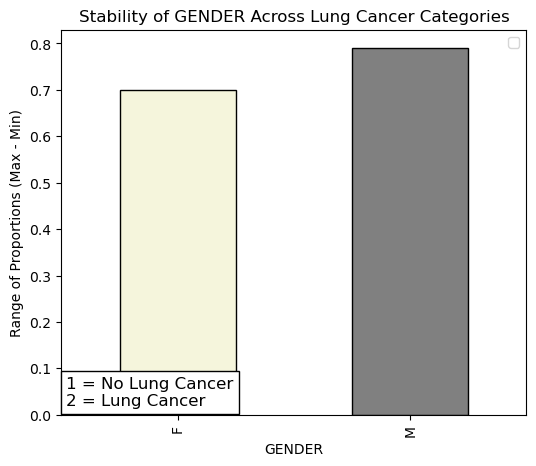

In [74]:
df = pd.read_csv(r"lungcancer/survey_lung_cancer[1].csv", encoding='latin-1')

# Example function for stability analysis
def plot_stability_with_box_label(col, df):
    # Calculate proportions for lung cancer categories
    grouped = df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack()
    
    # Calculate the range of proportions (max - min) for each category
    stability = grouped.max(axis=1) - grouped.min(axis=1)
    
    # Plot the stability (lower = less change)
    ax = stability.plot(kind='bar', figsize=(6, 5), edgecolor='black')
    plt.title(f"Stability of {col} Across Lung Cancer Categories")
    plt.xlabel(col)
    plt.ylabel("Range of Proportions (Max - Min)")

   # Define colors based on lung cancer categories
    color_map = {'Yes': 'beige', 'No': 'gray'}
    
    # Plot the bars for lung cancer categories with distinct colors
    for i, (category, color) in enumerate(color_map.items()):
        ax.patches[i].set_facecolor(color)

    # Add a box label on the top-left
    plt.text(0.01, 0.10, "1 = No Lung Cancer\n2 = Lung Cancer", 
             transform=plt.gca().transAxes, fontsize=12, color='black', 
             verticalalignment='top', horizontalalignment='left', 
             bbox=dict(facecolor='white', edgecolor='black'))

    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()

# Usage example (use your own dataset)
plot_stability_with_box_label('GENDER', df) 


According to the graph, being born a certain gender does not correlate with having an increased risk of Lung Cancer.

<span style="display: block; text-align: center;font-size:120%;"><b>If the attribute (variable) has little variation with the presence of lung cancer then variable provides little to no value.</b></span>

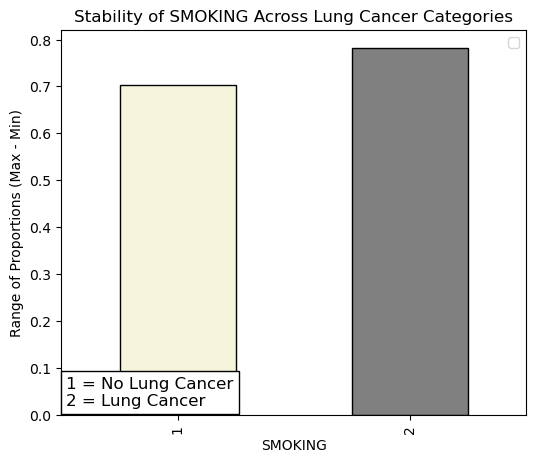

In [19]:
plot_stability_with_box_label('SMOKING', df)

Smoking has little correlation with having lung cancer. This means that smoking most likely do

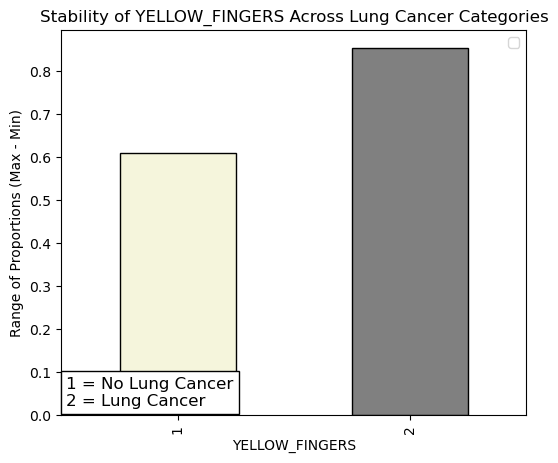

In [20]:
plot_stability_with_box_label('YELLOW_FINGERS', df)

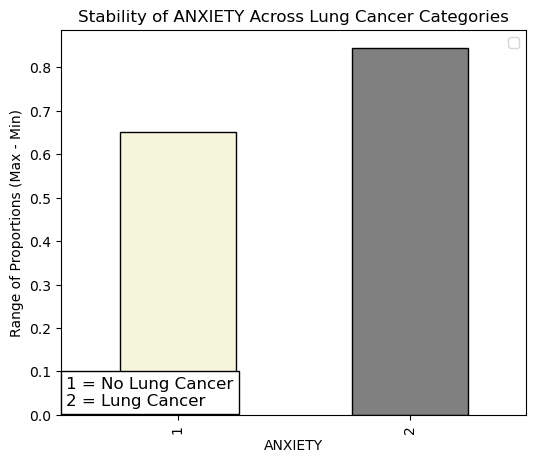

In [21]:
plot_stability_with_box_label('ANXIETY', df)

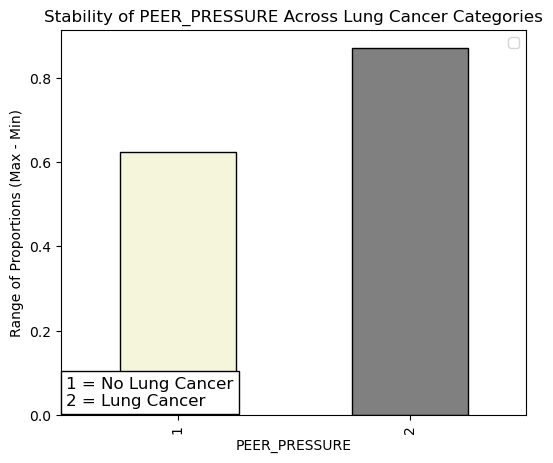

In [22]:
plot_stability_with_box_label('PEER_PRESSURE', df)

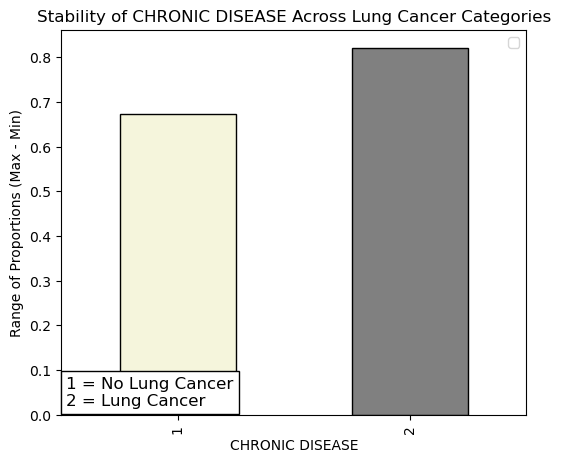

In [23]:
plot_stability_with_box_label('CHRONIC DISEASE', df)

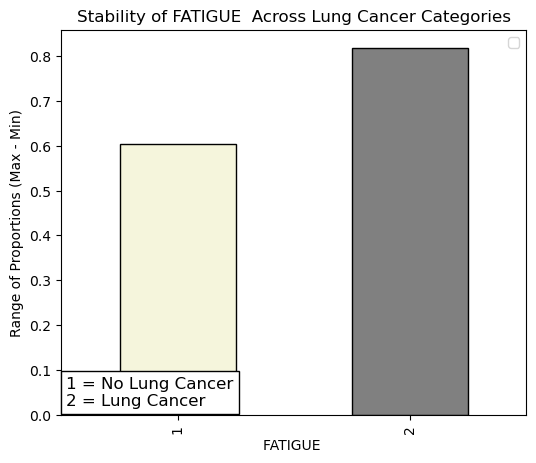

In [24]:
plot_stability_with_box_label('FATIGUE ', df)

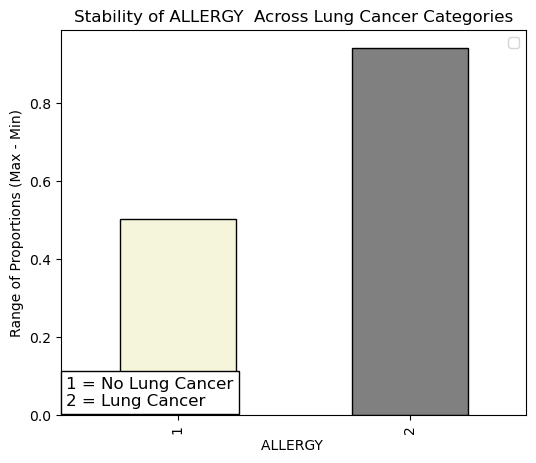

In [25]:
plot_stability_with_box_label('ALLERGY ', df)

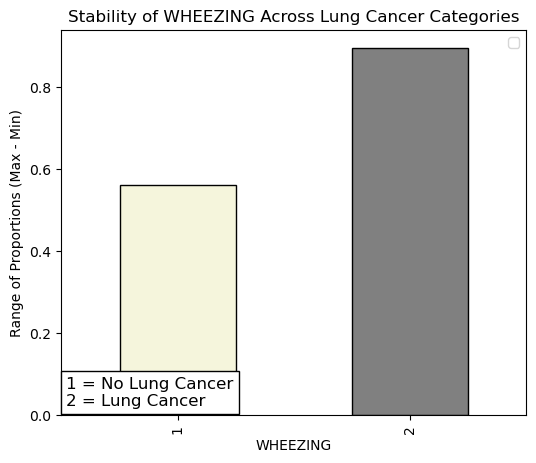

In [26]:
plot_stability_with_box_label('WHEEZING', df)

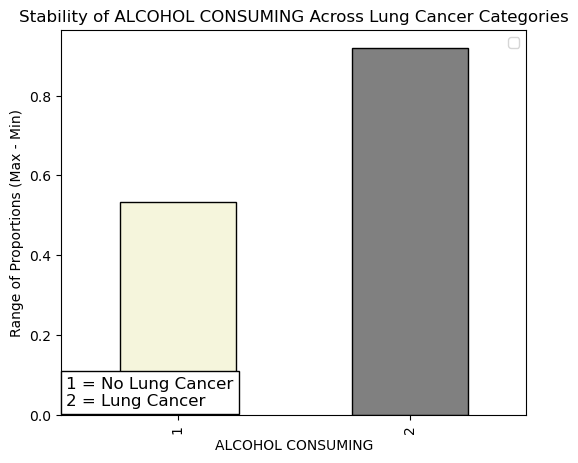

In [27]:
plot_stability_with_box_label('ALCOHOL CONSUMING', df)

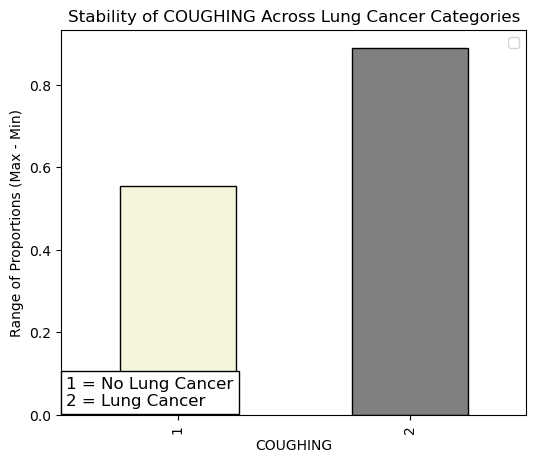

In [28]:
plot_stability_with_box_label('COUGHING', df)

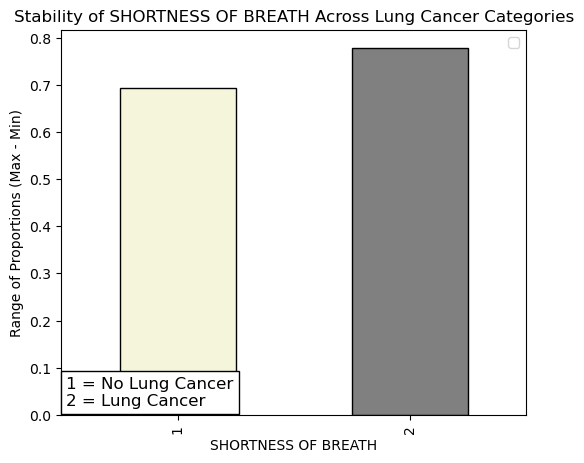

In [29]:
plot_stability_with_box_label('SHORTNESS OF BREATH', df)

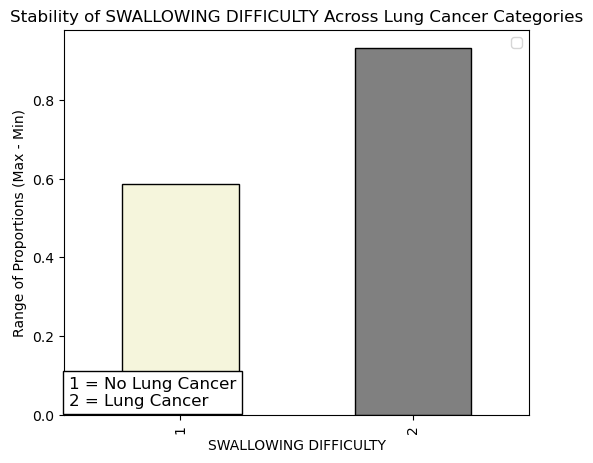

In [30]:
plot_stability_with_box_label('SWALLOWING DIFFICULTY', df)

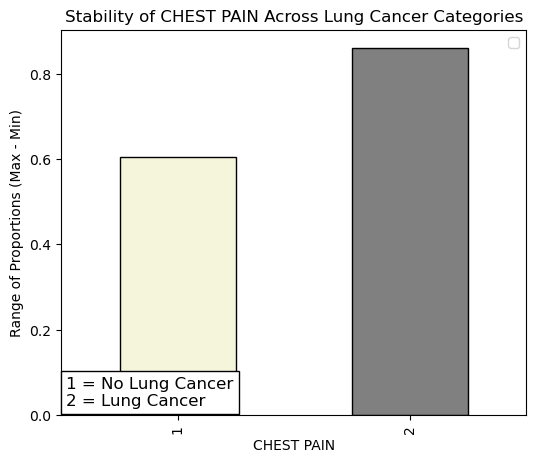

In [31]:
plot_stability_with_box_label('CHEST PAIN', df)

<span style="display: block; text-align: center;font-size: 110%;">After visualizing the data, the variables that have little to none variation compared to the target variable, 'LUNG_CANCER' are: <b>'SMOKING','GENDER', 'AGE',</b> and <b>'SHORTNESS OF BREATH'</b>.</span>

In [32]:
df.columns = df.columns.str.strip()

In [33]:
df = df.drop(columns=['GENDER', 'AGE', 'SMOKING', 'SHORTNESS OF BREATH'])

In [34]:
df

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,1,1,2,1,2,2,2,2,2,YES
1,1,1,1,2,2,2,1,1,1,2,2,YES
2,1,1,2,1,2,1,2,1,2,1,2,NO
3,2,2,1,1,1,1,1,2,1,2,2,NO
4,2,1,1,1,1,1,2,1,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,2,1,1,2,2,2,1,YES
305,1,1,1,1,2,2,2,2,2,1,2,YES
306,1,1,1,1,1,2,2,2,2,1,2,YES
307,1,2,1,1,2,2,1,2,2,1,2,YES


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(data)

In [36]:
X_scaled

array([[ 0.97142265,  0.72817582, -1.09108945, ...,  1.06748999,
         0.89006056,  0.39957961],
       [ 0.97142265,  1.32596442,  0.91651514, ...,  1.06748999,
         0.89006056,  0.39957961],
       [-1.02941804, -0.46740138, -1.09108945, ..., -0.93677693,
         0.89006056, -2.5026302 ],
       ...,
       [ 0.97142265, -0.94563226,  0.91651514, ..., -0.93677693,
         0.89006056, -2.5026302 ],
       [ 0.97142265, -2.02165174, -1.09108945, ...,  1.06748999,
         0.89006056, -2.5026302 ],
       [ 0.97142265, -0.34784366, -1.09108945, ...,  1.06748999,
         0.89006056,  0.39957961]])

## <span style="display: block; text-align: center;font-size:130%;">Random Forest</span>

In [37]:
X = data.iloc[:, 0:15]

y = data.iloc[:, 15]

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = rf.predict(X_test)

In [41]:
rf.score(X_test, y_test)

0.8571428571428571

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



In [44]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [45]:
features.head(15)

,0
GENDER,0.049532
AGE,0.217470
SMOKING,0.038857
YELLOW_FINGERS,0.070641
ANXIETY,0.049766
PEER_PRESSURE,0.066072
CHRONIC DISEASE,0.075002
FATIGUE,0.061691
ALLERGY,0.079497
WHEEZING,0.054263


In [46]:
rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = 'entropy',
                             min_samples_split = 10,
                             max_depth = 17,
                             random_state = 42,
                             class_weight='balanced'
                            )

In [47]:
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=17, min_samples_split=10, n_estimators=1000,
                       random_state=42)

In [48]:
rf2.score(X_test, y_test)

0.9642857142857143

In [49]:
y_pred2 = rf2.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98        44

    accuracy                           0.96        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.96      0.96      0.96        56



<b>The weighted average for the <u>RandomForest</u> is <u>96% accurate.</u></b>

## Cross Verification